# 0. Installation (one time job)

In [1]:
# !pip install scikit-learn==0.23.1

In [2]:
# !pip install pandas

In [3]:
# !pip install matplotlib

# 1. Import Library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree, export_graphviz # Visualize Tree / Rules

# 2. Import ASD Data

In [5]:
# Loading the dataset
# ASD_data = pd.read_csv('./data.csv')
ASD_data = pd.read_csv('./Toddler Autism dataset.csv')

# Print the first 5 rows of the dataframe.
print(ASD_data.head())

   Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class/ASD Traits   
0                No  
1     

In [6]:
# Replace special 
ASD_data.columns=ASD_data.columns.str.replace('-','_')
ASD_data.columns=ASD_data.columns.str.replace('/','_')
ASD_data.columns=ASD_data.columns.str.replace(' ','_')
print(ASD_data.head())

   Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat_10_Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who_completed_the_test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class_ASD_Traits_  
0                No  
1     

In [7]:
# observing the shape of the data
print(ASD_data.shape)

(1054, 19)


# 3. Data Preprocessing

## 3.1. Choose appropriate features 

In [8]:
Sex = pd.Categorical(ASD_data['Sex']).codes
Ethnicity = pd.Categorical(ASD_data['Ethnicity']).codes
Jaundice = pd.Categorical(ASD_data['Jaundice']).codes
Family_mem_with_ASD = pd.Categorical(ASD_data['Family_mem_with_ASD']).codes
Class_ASD_Traits_ = pd.Categorical(ASD_data['Class_ASD_Traits_']).codes

ASD_data['Sex'] = Sex
ASD_data['Ethnicity'] = Ethnicity
ASD_data['Jaundice'] = Jaundice
ASD_data['Family_mem_with_ASD'] = Family_mem_with_ASD
ASD_data['Class_ASD_Traits_'] = Class_ASD_Traits_

# Check the data and think why we drop these variables?
# X = ASD_data.drop(['Case_No', 'Who_completed_the_test', 'Score', 'ASD_Traits', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10'], axis=1)
X = ASD_data.drop(['Case_No', 'Who_completed_the_test', 'Qchat_10_Score', 'Class_ASD_Traits_'], axis=1)


In [9]:
X.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD'],
      dtype='object')

## 3.2 Choose target

In [10]:
Y_classification = ASD_data.Class_ASD_Traits_
Y_regression = ASD_data.Qchat_10_Score

# 4. Build Classification Tree

## 4.1 Split the dataset into training set and test set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_classification, test_size=1 / 3, random_state=1,
                                                    stratify=Y_classification)
print(X_train.shape)
print(X_test.shape)
X

(702, 15)
(352, 15)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD
0,0,0,0,0,0,0,1,1,0,1,28,0,8,1,0
1,1,1,0,0,0,1,1,0,0,0,36,1,5,1,0
2,1,0,0,0,0,0,1,1,0,1,36,1,8,1,0
3,1,1,1,1,1,1,1,1,1,1,24,1,0,0,0
4,1,1,0,1,1,1,1,1,1,1,20,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,24,0,5,0,1
1050,0,0,1,1,1,0,1,0,1,0,12,1,7,1,0
1051,1,0,1,1,1,1,1,1,1,1,18,1,8,1,0
1052,1,0,0,0,0,0,0,1,0,1,19,1,5,0,1


In [12]:
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD
723,1,1,0,0,0,1,1,1,0,1,23,1,5,1,1
492,1,0,0,1,1,0,1,0,1,1,28,1,5,1,0
990,1,0,1,1,1,1,1,0,1,1,35,0,8,0,0
836,1,1,1,1,1,1,1,1,1,1,29,1,5,0,0
317,0,1,0,1,0,1,1,1,1,1,16,1,8,1,1


In [13]:
y_train.head()

723    1
492    1
990    1
836    1
317    1
Name: Class_ASD_Traits_, dtype: int8

## 4.2 Build classification tree

In [14]:
dt = DecisionTreeClassifier(criterion='gini',random_state=0)
dt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
dt

Accuracy on training set: 1.000
Accuracy on test set: 0.923


DecisionTreeClassifier(random_state=0)

## 4.3. Use grid search to optimize the parameters

In [15]:

best_para = {'max_depth':0, 'min_samples':0}
best_test_acc = 0

# grid serach
for max_depth in range(1, 10):
    for min_samples in range(2,100):
        dt = DecisionTreeClassifier(criterion='gini',max_depth=max_depth, min_samples_split = min_samples, random_state=0)
        dt.fit(X_train, y_train)
        if dt.score(X_test, y_test) > best_test_acc:
            best_test_acc = dt.score(X_test, y_test)
            best_para['max_depth'] = max_depth
            best_para['min_samples'] = min_samples

dt = DecisionTreeClassifier(criterion='gini',max_depth=best_para['max_depth'], min_samples_split = best_para['min_samples'], random_state=0)
dt.fit(X_train, y_train)
print("Best accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Best accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
print("Best decision tree with parameter max_depth of {0} and min_samples_split of {1}".format(best_para['max_depth'], best_para['min_samples']))

Best accuracy on training set: 0.990
Best accuracy on test set: 0.923
Best decision tree with parameter max_depth of 8 and min_samples_split of 2


# 5. Build Regression Tree

## 5.1 Split the dataset into training set and test set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_regression, test_size=1 / 3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(702, 15)
(352, 15)


## 5.2 Build regreesion tree

In [17]:
dt = DecisionTreeRegressor(criterion='mse',random_state=0)
dt.fit(X_train, y_train)


print("Score on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Score on test set: {:.3f}".format(dt.score(X_test, y_test)))

Score on training set: 1.000
Score on test set: 0.924


## 5.3. Use grid search to optimize the parameters

In [18]:
best_para = {'max_depth':0, 'min_samples':0}
best_test_acc = 0
# grid serach
for max_depth in range(1, 20):
    for min_samples in range(2,50):
        dt = DecisionTreeRegressor(criterion='mse',max_depth=max_depth, min_samples_split = min_samples, random_state=0)
        dt.fit(X_train, y_train)
        if dt.score(X_test, y_test) > best_test_acc:
            best_test_acc = dt.score(X_test, y_test)
            best_para['max_depth'] = max_depth
            best_para['min_samples'] = min_samples

dt = DecisionTreeRegressor(criterion='mse',max_depth=best_para['max_depth'], min_samples_split = best_para['min_samples'], random_state=0)
dt.fit(X_train, y_train)
print("Best score on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Best score on test set: {:.3f}".format(dt.score(X_test, y_test)))
print("Best regression tree with parameter max_depth of {0} and min_samples_split of {1}".format(best_para['max_depth'], best_para['min_samples']))


Best score on training set: 0.985
Best score on test set: 0.932
Best regression tree with parameter max_depth of 9 and min_samples_split of 6


# 6. Extract all the rules (Decsion Tree's level = 8) from the classification tree

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

|--- A7 <= 0.50
|   |--- A9 <= 0.50
|   |   |--- A2 <= 0.50
|   |   |   |--- A5 <= 0.50
|   |   |   |   |--- A3 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- A3 >  0.50
|   |   |   |   |   |--- A8 <= 0.50
|   |   |   |   |   |   |--- A10 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- A10 >  0.50
|   |   |   |   |   |   |   |--- A4 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- A4 >  0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- A8 >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- A5 >  0.50
|   |   |   |   |--- A8 <= 0.50
|   |   |   |   |   |--- Jaundice <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Jaundice >  0.50
|   |   |   |   |   |   |--- Ethnicity <= 8.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Ethnicity >  8.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- A8 >  0.50
|   |   

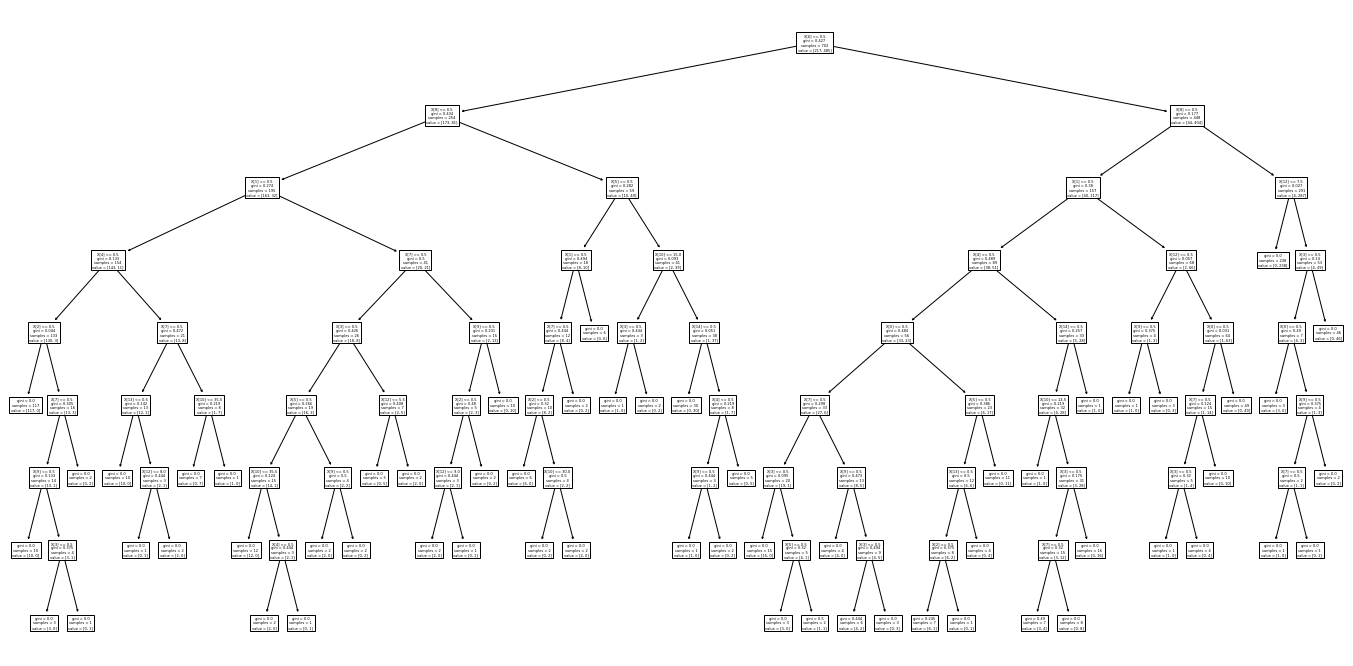

In [27]:
###################################################################
# Extract all the rules from the classification tree
###################################################################
from sklearn.tree import _tree
from sklearn.tree import export_text


def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)
# dt = DecisionTreeRegressor(criterion='mse',max_depth=8, min_samples_split = best_para['min_samples'], random_state=0)
dt = DecisionTreeClassifier(criterion='gini',max_depth=8, min_samples_split = 2, random_state=0)
dt.fit(X_train, y_train)

# tree_to_code(dt, X.columns)

tree_rules = export_text(dt, feature_names=list(X.columns))
print(tree_rules)

plot_tree(dt)
plt.show()
#
#
#
#
#
#
#
#
#

### Useful Tips:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_classification, test_size=1 / 3, random_state=1,
                                                    stratify=Y_classification)
print(X_train.shape)
print(X_test.shape)

dt = DecisionTreeClassifier(criterion='gini',random_state=0, max_depth=3)
dt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
dt

(702, 15)
(352, 15)
Accuracy on training set: 0.879
Accuracy on test set: 0.838


DecisionTreeClassifier(max_depth=3, random_state=0)

In [21]:
plt.rcParams['figure.figsize'] = [24, 12] # Optionally adjust inline graph size

### install graphviz

In [22]:
#!pip install graphviz

Also in Linux terminal: sudo apt install graphviz

In [25]:
import graphviz 
dot_data = export_graphviz(dt, out_file=None, 
                      feature_names=X.columns,  
                      class_names=['Not ASD', 'ASD'], # "0": Not ASD ; "1": ASD
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
# graph
graph.render("tree_rules_image", view=True)
f = open("tree_rules.txt","w+")
f.write(dot_data)
f.close()


---
`The end is called new start.` --- ISS **I** **S**(elf) **S**(tudy)